<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/EcuacionesDiferenciales3_Leapfrog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones diferenciales (continuación)

### Ejercicio: Filtro Low-Pass

Las ecuaciones son

$$
V_{in}-V_{out}=IR, Q=CV_{out}, I=\frac{dQ}{dt}
$$

De forma equivalente tenemos entonces:

$$
\frac{dV_{out}}{dt} = \frac{1}{RC} (V_{in}-V_{out})
$$

$$
V_{in} =
\left\{
\begin{array}{ll}
      1  & \mathrm{si}\, floor(2t)\, \mathrm{es\, par}\\
      -1 & \\
\end{array}
\right.
$$

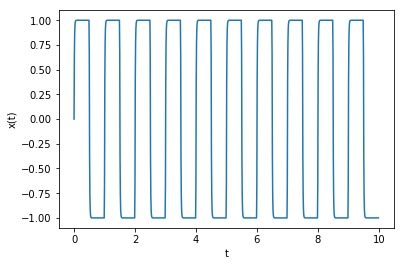

In [ ]:
# Ejercicio:Filtro-LowPass
from pylab import *
RC=0.01
def V_in(t):
    if int(2*t)%2==0:
        return 1
    else:
        return -1

def f(x,t):
    return (V_in(t)-x)/float(RC)

a,b=0.0,10.0
N=1000
h=(b-a)/N
x=0.0
tpoints=arange(a,b,h)
xpoints=[]

for t in tpoints:
    xpoints.append(x)
    k1=h*f(x,t)
    k2=h*f(x+0.5*k1,t+0.5*h)
    k3=h*f(x+0.5*k2,t+0.5*h)
    k4=h*f(x+k3,t+h)
    x+=(k1+2*k2+2*k3+k4)/float(6)
plot(tpoints,xpoints)
xlabel('t')
ylabel('x(t)')
show()

## Ecuaciones Diferenciales de segundo orden

Consideremos el caso más simple, donde sólo dependemos de la variable x. La forma general de la ecuación es:
$$\frac{d^2x}{dt^2}=f(x,\frac{dx}{dt},t)$$
donde $f$ es una función arbitraria.
El truco es plantear otra variable $y=\frac{dx}{dt}$, tal que el sistema se reduzca a un sistema de dos ecuaciones lineales acopladas:
$$
\frac{dx}{dt}=y\\
\frac{dy}{dt}=f(x,y,t)
$$

### Caida libre

### ejercicio

Escribir expresion para un objeto que se suelta una altura $h$. Completar el código para plotear también la expresión analítica.

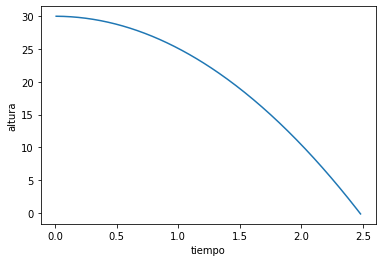

In [ ]:
from pylab import *

def f(r,t):
    g=-9.81
    x=r[0]
    v=r[1]
    fx=v
    fv=g
    return array([fx,fv],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_v=[]
lista_x = []
lista_t = []
t=0
r=([30.,0.]) #cond inicial
while r[0]>0.0:
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6.
    t+=h
    lista_x.append(r[0])
    lista_v.append(r[1])
    lista_t.append(t)
plot(lista_t,lista_x)
xlabel('tiempo')
ylabel('altura')
show()

### Péndulo no lineal
El desplazamiento del brazo en la posición vertical está dado en términos de $\theta$ y su dirección tangencial es $l\frac{d^2\theta}{dt^2}$.

$$
ml\frac{d^2\theta}{dt^2} = -mg sin(\theta)
$$

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l} sin(\theta)
$$

Expresando la ecuación de segundo órden como dos ecuaciones diferenciales de primer órden.

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -\frac{g}{l}sin\theta
$$


### ejercicio:
Implementa en el código de abajo la f correspondiente para resolver numericamente el péndulo no lineal

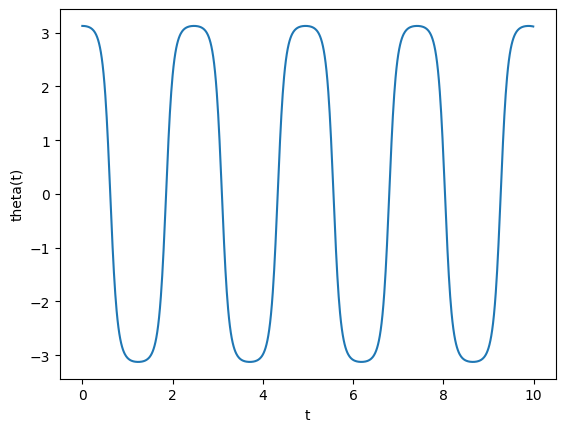

In [ ]:
from pylab import *
def f(r,t):
  g=9.81
  l=0.1
  theta=r[0]
  omega=r[1]
  ftheta=omega
  fomega=(-g/l)*sin(theta)
  return array([ftheta,fomega],float)

def RK4_orden2(fv,a,b,r,N):
  h=abs(b-a)/N
  lista_t=arange(a,b,h)
  lista_x,lista_y=[],[]
  for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    k1=h*fv(r,t)
    k2=h*fv(r+0.5*k1,t+0.5*h)
    k3=h*fv(r+0.5*k2,t+0.5*h)
    k4=h*fv(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6
  return lista_t,lista_x,lista_y

r = array([179/180*pi,0],float)
lista_t ,lista_theta ,lista_omega=RK4_orden2(f,0,10,r,1000)

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

# Método leapfrog

Considerando la expresión general para la ecuación diferencial de primer orden de una sóla variable:

$$
\frac{dx}{dt} = f(x,t)
$$

Expresamos a Runge-Kutta de segundo órden de la siguiente manera:

$$
x(t+\frac{1}{2}h) = x(t) + \frac{1}{2}hf(x,t)\\
x(t+h)=x(t)+hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)
$$

Pero ahora en vez de calcular el punto medio de $x(t+h)$ lo calculamos del previo punto medio $x(t+\frac{1}{2}h)$, en términos matemáticos:

$$
x(t+\frac{3}{2}h) = x(t+\frac{1}{2}h) + hf(x(t+h),t+h)\\
$$
Leapfrog es una variante de esta idea calculamos los valores con índice semi entero del valor previo.

$$
x(t+2h) = x(t+h) + hf(x(t+\frac{3}{2}h),t+\frac{3}{2}h)\\
$$

De esta manera podemos obtener las expresiones sobre las cuales podemos iterar.

$$
x(t+h) = x(t) + hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
x(t+\frac{3}{2}h) = x(t+\frac{1}{2}h) + hf(x(t+h),t+h)\\
$$

Podemos generalizar a ecuaciones diferenciales simultaneas pasando de $x$ a  $\mathbf{r}$ y de una función $f$ a la función vectorial $\mathbf{f}$

$$
\mathbf{r}(t+h) = \mathbf{r}(t) + h\mathbf{f}(\mathbf{r}(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
\mathbf{r}(t+\frac{3}{2}h) = \mathbf{r}(t+\frac{1}{2}h) + h\mathbf{f}(\mathbf{r}(t+h),t+h)\\
$$

Si bien Runge-Kutta de cuarto órden es mejor y no implica demasiado esfuerzo implementarlo, leap frog tiene propiedades interesantes. Por ejemplo es simétrico con respecto a inversión temporal. $\Longrightarrow$ Para sistemas físicos, conserva energía....!!!!

Para ver esto hacemos pasos para atrás en el tiempo desde un punto adelante. Es decir usamos $-h$ a un tiempo $t+\frac{3}{2}h$.

Usando primero $-h$
$$
x(t-h) = x(t) - hf(x(t-\frac{1}{2}h),t-\frac{1}{2}h)\\
x(t-\frac{3}{2}h) = x(t-\frac{1}{2}h) + hf(x(t-h),t-h)\\
$$

Ahora evualuando en $t+\frac{3}{2}h$.

$$
x(t+\frac{1}{2}h) = x(t+\frac{3}{2}h) - hf(x(t+h),t+h)\\
x(t) = x(t+h) - hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
$$



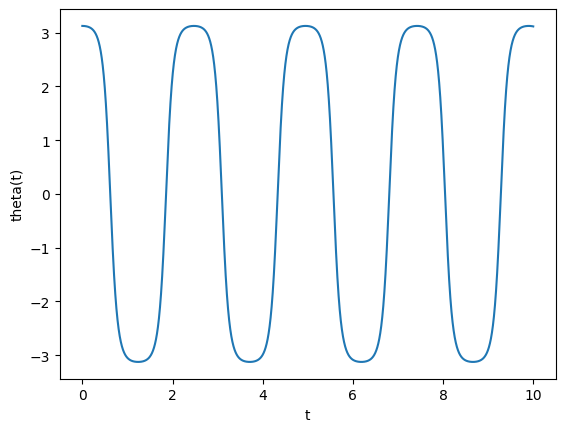

In [ ]:
#Runge-Kutta orden 2 pendulo no lineal sin vectorizar
g=9.81
l=0.1
ftheta=lambda theta,omega,t: omega
fomega=lambda theta,omega,t:(-g/l)*sin(theta)

def RK2_orden2(ftheta,fomega,a,b,theta,omega,N):
  h=abs(b-a)/N
  lista_t=arange(a,b,h)
  lista_x,lista_y=[],[]
  for t in lista_t:
    lista_x.append(theta)
    lista_y.append(omega)
    k1_theta=h*ftheta(theta,omega,t)
    k2_theta=h*ftheta(theta+0.5*k1_theta,omega,t+0.5*h)
    theta+=k2_theta
    k1_omega=h*fomega(theta,omega,t)
    k2_omega=h*fomega(theta,omega+0.5*k1_omega,t+0.5*h)
    omega+=k2_omega
  return lista_t,lista_x,lista_y

#r = array([179/180*pi,0],float)
lista_t ,lista_theta ,lista_omega=RK2_orden2(ftheta,fomega,0,10,179/180*pi,0,10000)

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

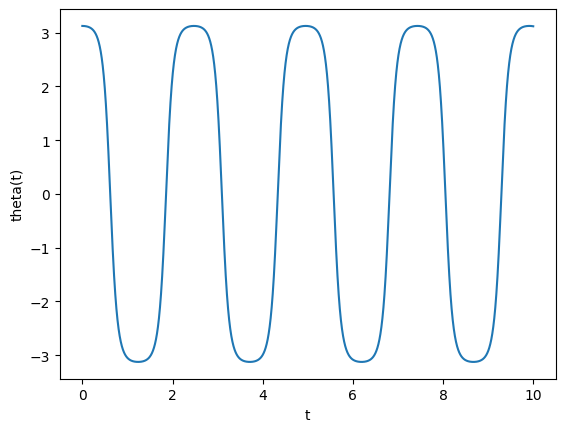

In [ ]:
#Runge-Kutta orden 2 pendulo no lineal
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

def RK2_orden2(fv,a,b,r,N):
  h=abs(b-a)/N
  lista_t=arange(a,b,h)
  lista_x,lista_y=[],[]
  for t in lista_t:
    lista_x.append(r[0])
    lista_y.append(r[1])
    k1=h*fv(r,t)
    k2=h*fv(r+0.5*k1,t+0.5*h)
    r+=k2
  return lista_t,lista_x,lista_y

r = array([179/180*pi,0],float)
lista_t ,lista_theta ,lista_omega=RK2_orden2(f,0,10,r,10000)

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

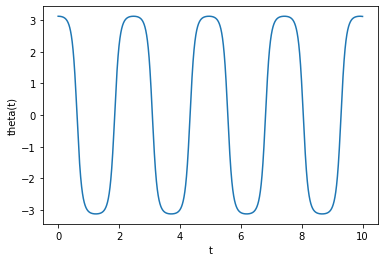

In [ ]:
#Runge-Kutta orden 2 pendulo 2
#Modificar esto para implementar leapfrog
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 10000
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []

r = array([179/180*pi,0],float)
for t in lista_t:
    lista_theta.append(r[0])
    rH=r+0.5*h*f(r,t)
    r+=h*f(r+0.5*h*f(r,t),t+0.5*h)

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

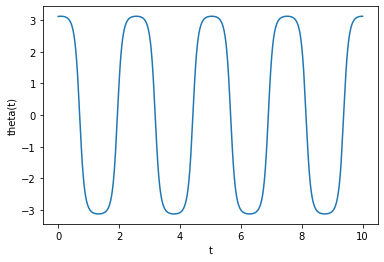

In [ ]:
#Runge-Kutta orden 2 pendulo 2 hacia atras
#Modificar esto para implementar leapfrog
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 10000
h = (b-a)/N

lista_t = arange(b,a,-h)
lista_theta = []

r = array([179/180*pi,0],float)
for t in lista_t:
    lista_theta.append(r[0])
    rH=r+0.5*h*f(r,t)
    r+=h*f(r+0.5*h*f(r,t),t+0.5*h)

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

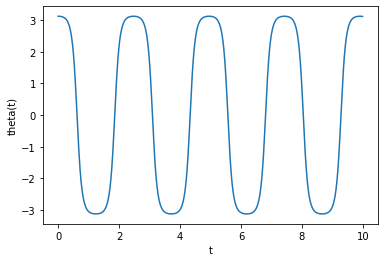

In [ ]:
#Solución de Leap-Frog
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []


r = array([179/180*pi,0],float)
rH = r+0.5*h*f(r,0)
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*f(rH,t+0.5*h)
    rH+=h*f(r,t+h)

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

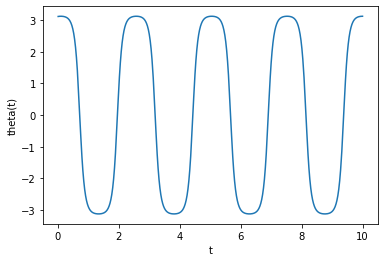

In [ ]:
#Solución de Leap-Frog hacia atras
from pylab import *

g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_t = arange(b,a,-h)
lista_theta = []


r = array([179/180*pi,0],float)
rH = r+0.5*h*f(r,0)
for t in lista_t:
    lista_theta.append(r[0])
    r+=h*f(rH,t+0.5*h)
    rH+=h*f(r,t+h)

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

### Oscilador forzado amortiguado

Tenemos la siguiente ecuación:

$$
\frac{d^2x}{dt^2}+\gamma\frac{dx}{dt}+\omega_0^2x = \frac{F}{m}
$$

Donde $\gamma$ es la constante de amortiguamiento y $\omega_0 = \sqrt{k}{m}$

### ejercicio

Escribe esta ecuación de segundo orden en terminos de 2 ecuaciones de primer orden

# AQUI

Recordemos que la energía el oscilador armónico es:

$$
E= \frac{1}{2}mv^2+\frac{1}{2}kx^2
$$

### ejercicio

Implementa una función que use el metodo leapfrog para el caso de m=k=1 con fuerza externa $F=0$, pocición inicial $x_{0}=0, v_{0}=1$ variando $\gamma=0, 0.01, 0.1$. Y grafica la posición y energía en función del tiempo.

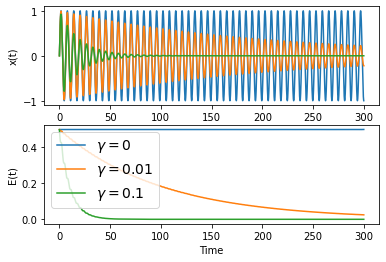

In [ ]:
from pylab import *

N = 10000
t = linspace(0,300,N)
dt = t[1] - t[0]


def leapfrog(F,x0,v0,gamma):
    x = zeros(N)
    v = zeros(N)
    E = zeros(N)


    x[0] = x0
    v[0] = v0


    fac1 = 1.0 - 0.5*gamma*dt
    fac2 = 1.0/(1.0 + 0.5*gamma*dt)

    for i in arange(N-1):
        #Aqui va tu codigo de leapfrog
        v[i + 1] = fac1*fac2*v[i] - fac2*dt*x[i] + fac2*dt*F[i]
        x[i + 1] = x[i] + dt*v[i + 1]
        E[i] += 0.5*(x[i]**2 + ((v[i] + v[i+1])/2.0)**2)

    E[-1] = 0.5*(x[-1]**2 + v[-1]**2)

    return x,v,E


F = zeros(N)
x1,v1,E1 = leapfrog(F,0.0,1.0,0.0) # x0 = 0.0, v0 = 1.0, gamma = 0.0
x2,v2,E2 = leapfrog(F,0.0,1.0,0.01) # x0 = 0.0, v0 = 1.0, gamma = 0.01
x3,v3,E3 = leapfrog(F,0.0,1.0,0.1) # x0 = 0.0, v0 = 1.0, gamma = 0.5

figure()
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\gamma = 0$")
plot(t,E2,label=r"$\gamma = 0.01$")
plot(t,E3,label=r"$\gamma = 0.1$")
ylabel("E(t)")

xlabel("Time")
rcParams['legend.fontsize'] = 14.0
legend(loc="upper left")

show()

### ejercicio

Ahora supongamos que la fuerza tiene la forma:

$$
F=F_0cos(\omega t)e^(\frac{-t^2}{T^2})
$$

Grafica la posición y la energía como función del tiempo, con $\gamma=0.1$ usando $\omega$ como $\omega_0$, $0.8\omega_0$ y $0.9\omega_0$. $F_0=1$ y $T=10$, describe lo que sucede mientras varias $\omega$.

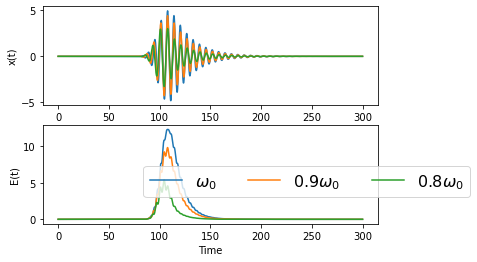

In [ ]:
def fuerza(f0,t,w,T):
          return f0*cos(w*t)*exp(-t**2/T**2)

F1 = zeros(N)
F2 = zeros(N)
F3 = zeros(N)
for i in range(N-1):
    F1[i] = fuerza(1.0,t[i] - 100.0,1.0,10.0)
    F2[i] = fuerza(1.0,t[i] - 100.0,0.9,10.0)
    F3[i] = fuerza(1.0,t[i] - 100.0,0.8,10.0)

x1,v1,E1 = leapfrog(F1,0.0,0.0,0.1)
x2,v2,E2 = leapfrog(F2,0.0,0.0,0.1)
x3,v3,E3 = leapfrog(F3,0.0,0.0,0.1)

figure()
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\omega_0$")
plot(t,E2,label=r"$0.9\omega_0$")
plot(t,E3,label=r"$0.8\omega_0$")
ylabel("E(t)")

xlabel("Time")
rcParams['legend.fontsize'] = 16.0
legend(loc=(0.3,0.27),ncol=3)
show()